In [1]:
import pandas as pd

<h1> Loading Dataset into Pandas </h1>

In [3]:
data = pd.read_csv('DataScienceSalaries.csv') # function reads data from CSV.
data.head(10) # Displays the 10 rows.

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [4]:
data.shape

(3755, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


<h1> Remove unnecessary Columns i.e Salary and Salary Currency </h1>

In [7]:
revised_data = data.drop(['salary','salary_currency'], axis=1) # drops unnecessary columns.
revised_data.head(10) # Displays revised Dataset

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,US,0,US,M


<h1> To remove the NaN missing values from updated dataframe. </h1>

In [9]:
missing_values = revised_data.isnull().sum() #Sums NaN Values.
missing_values #Displays NaN Values

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

<h1> To check duplicates value in the dataframe </h1>

In [11]:
duplicates = revised_data.duplicated().sum() # Counts number of duplicate rows in the DataFrame
duplicates

1171

In [13]:
revised_data[revised_data.duplicated()] # Retrieve duplicate rows from the DataFrame

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
115,2023,SE,FT,Data Scientist,150000,US,0,US,M
123,2023,SE,FT,Analytics Engineer,289800,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,US,100,US,M
154,2023,MI,FT,Data Engineer,70000,US,100,US,M
160,2023,SE,FT,Data Engineer,115000,US,0,US,M
...,...,...,...,...,...,...,...,...,...
3439,2022,MI,FT,Data Scientist,78000,US,100,US,M
3440,2022,SE,FT,Data Engineer,135000,US,100,US,M
3441,2022,SE,FT,Data Engineer,115000,US,100,US,M
3586,2021,MI,FT,Data Engineer,200000,US,100,US,L


<h1> To see the unique values from all the columns in the dataframe. </h1>

In [15]:
unique_values = revised_data.nunique() # calculates unique values in each column using nunique() function.
unique_values

work_year                4
experience_level         4
employment_type          4
job_title               93
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

<h1>
Rename the experience level columns as below. <br>
SE – Senior Level/Expert <br>
MI – Medium Level/Intermediate <br>
EN – Entry Level <br>
EX – Executive Level <br>
</h1>

In [18]:
# Replacing values in the 'experience_level' column.
revised_data['experience_level']=revised_data['experience_level'].replace(['SE','MI','EN','EX'], #values to be replaced
                                                          ['Senior Level/Expert',
                                                           'Medium Level/Intermediate',
                                                           'Entry Level',
                                                           'Executive Level'])
revised_data.head(10)                                                

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior Level/Expert,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,Medium Level/Intermediate,CT,ML Engineer,30000,US,100,US,S
2,2023,Medium Level/Intermediate,CT,ML Engineer,25500,US,100,US,S
3,2023,Senior Level/Expert,FT,Data Scientist,175000,CA,100,CA,M
4,2023,Senior Level/Expert,FT,Data Scientist,120000,CA,100,CA,M
5,2023,Senior Level/Expert,FT,Applied Scientist,222200,US,0,US,L
6,2023,Senior Level/Expert,FT,Applied Scientist,136000,US,0,US,L
7,2023,Senior Level/Expert,FT,Data Scientist,219000,CA,0,CA,M
8,2023,Senior Level/Expert,FT,Data Scientist,141000,CA,0,CA,M
9,2023,Senior Level/Expert,FT,Data Scientist,147100,US,0,US,M


<h1> Program to show summary statistics of sum, mean, standard deviation, skewness, and kurtosis of any variable. </h1>

<h2> Sum of Salaries </h2>

In [21]:
sum = revised_data['salary_in_usd'].sum() # sum of salary in usd using ".sum()".
print('Sum of Salaries is:',sum)

Sum of Salaries is: 516576814


<h2> Mean of Salaries </h2>

In [22]:
Mean = revised_data['salary_in_usd'].mean() # mean of salary in usd using ".mean()".
print('Mean of Salaries is:',Mean)

Mean of Salaries is: 137570.38988015978


<h2> Standard Deviation of Salaries </h2>

In [24]:
σ = revised_data['salary_in_usd'].std() # SD of salary in usd using ".std()".
print('Standard Devalion(σ) of Salaries is:',σ)

Standard Devalion(σ) of Salaries is: 63055.625278224084


<h2> Skewness of Salaries </h2>

In [25]:
Skewness = revised_data['salary_in_usd'].skew() # Skewness of salary in usd using ".skew()".
print('Skewness of Salaries is:',Skewness)

Skewness of Salaries is: 0.5364011659712974


<h2> Kurtosis of Salaries </h2>

In [27]:
Kurt = revised_data['salary_in_usd'].kurtosis() # Kurtosis of salary in usd using ".kurtosis()".
print('Kurtosis of Salaries is:',Kurt)

Kurtosis of Salaries is: 0.8340064594833612


<h1> Program to calculate and show correlation of all variables. </h1>

In [29]:
# selects columns with data type 'int64'."corr()" calculates the correlation matrix of selected columns.
r = revised_data.select_dtypes(include=['int64']).corr() 
r

,work_year,salary_in_usd,remote_ratio
work_year,1.00000,0.228290,-0.236430
salary_in_usd,0.22829,1.000000,-0.064171
remote_ratio,-0.23643,-0.064171,1.000000


<h1> Program to find out top 15 jobs. Make a bar graph of sales as well. </h1>

In [31]:
# Calculating the count of each unique job title and selecting the top 15
topjobs = revised_data.groupby('job_title')['salary_in_usd'].mean().nlargest(15)
topjobs

job_title
Data Science Tech Lead                 375000.000000
Cloud Data Architect                   250000.000000
Data Lead                              212500.000000
Data Analytics Lead                    211254.500000
Principal Data Scientist               198171.125000
Director of Data Science               195140.727273
Principal Data Engineer                192500.000000
Machine Learning Software Engineer     192420.000000
Data Science Manager                   191278.775862
Applied Scientist                      190264.482759
Principal Machine Learning Engineer    190000.000000
Head of Data                           183857.500000
Data Infrastructure Engineer           175051.666667
Business Intelligence Engineer         174150.000000
Machine Learning Scientist             163220.076923
Name: salary_in_usd, dtype: float64

<h1> Bar Graph of topjobs </h1>

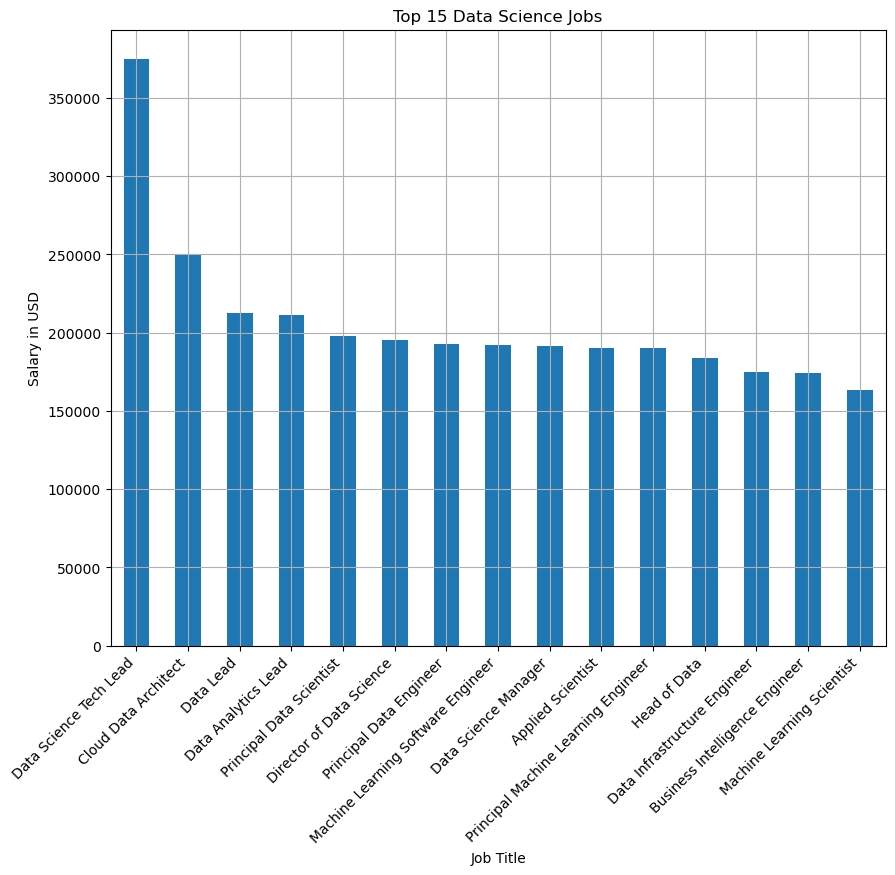

In [33]:
import matplotlib.pyplot as plt #import
plt.figure(figsize=(10, 8)) # figure size
topjobs.plot(kind='bar')  # Creating a bar plot
plt.title('Top 15 Data Science Jobs') # title of the plot
plt.xlabel('Job Title') # label for the x-axis
plt.ylabel('Salary in USD') # label for the y-axis
plt.xticks(rotation=45, ha='right') # Rotating x-axis for better readability
plt.grid(True)  # Add grid lines
plt.show() # Showing the plot

<h1> Jobs Highest Salaries </h1>

In [35]:
# data by job title and calculating average salaries
average_salaries = revised_data.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
average_salaries

job_title
Data Science Tech Lead           375000.000
Cloud Data Architect             250000.000
Data Lead                        212500.000
Data Analytics Lead              211254.500
Principal Data Scientist         198171.125
                                    ...    
Autonomous Vehicle Technician     26277.500
3D Computer Vision Researcher     21352.250
Staff Data Analyst                15000.000
Product Data Scientist             8000.000
Power BI Developer                 5409.000
Name: salary_in_usd, Length: 93, dtype: float64

<h1> Bar Graph of Highest Salary </h1>

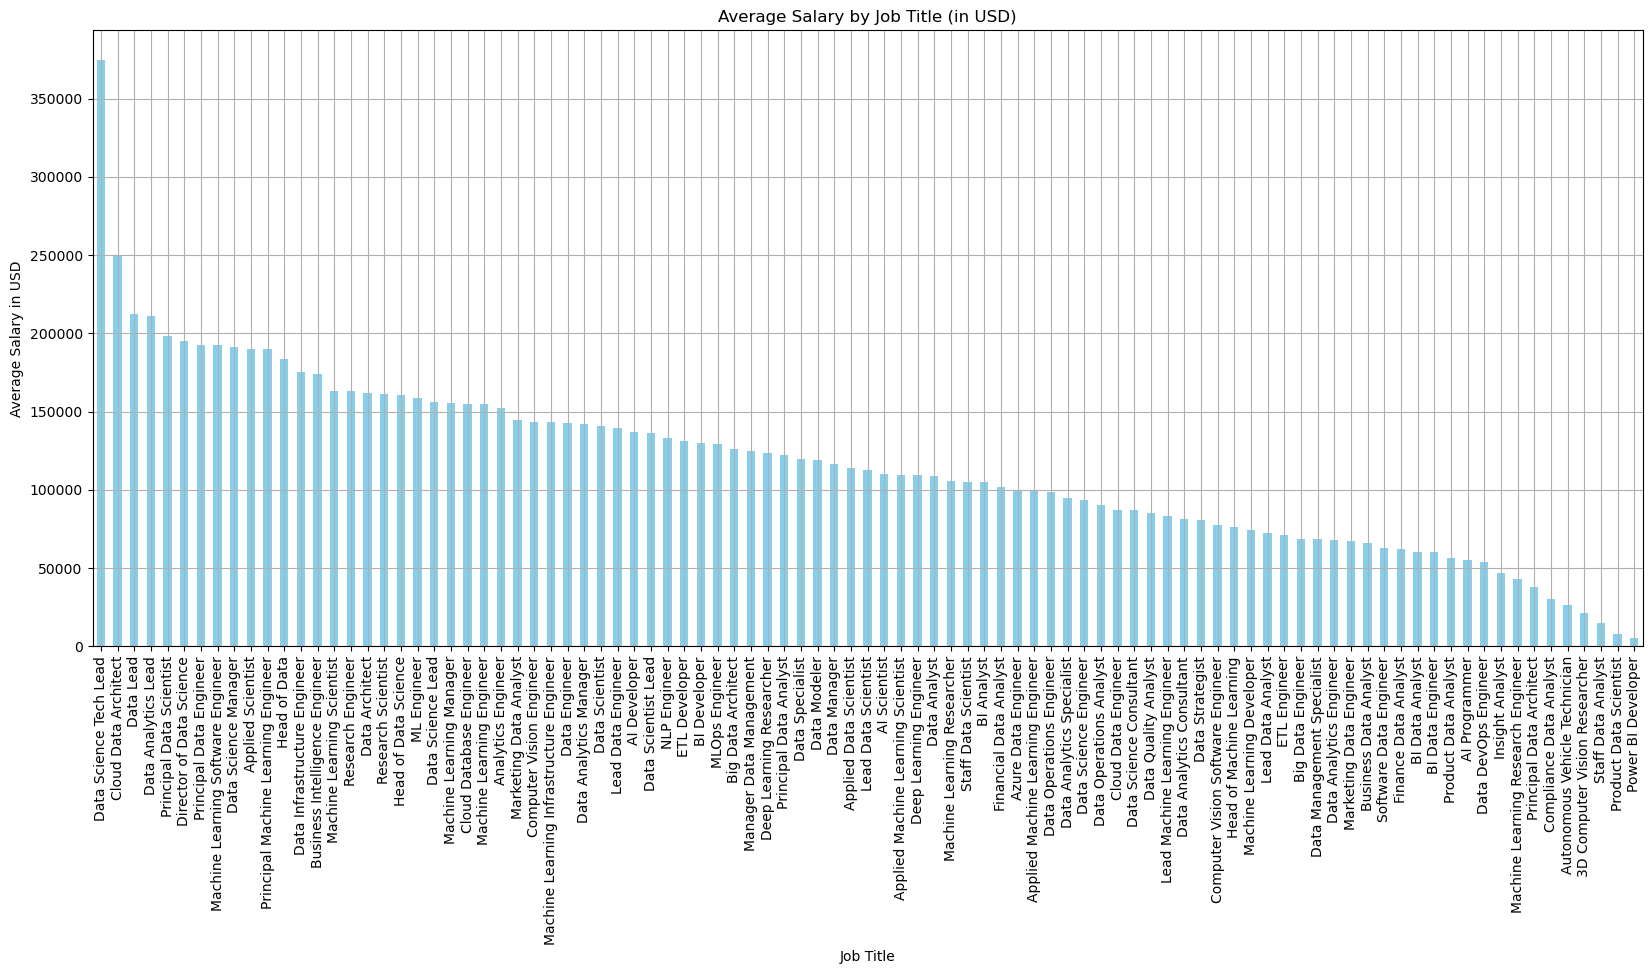

In [37]:
# Creating a bar graph of average salaries by job title
plt.figure(figsize=(20, 8))  # figure size
average_salaries.plot(kind='bar', color='skyblue') # Creating a bar plot
plt.title('Average Salary by Job Title (in USD)') # title of the plot
plt.xlabel('Job Title') # label for the x-axis
plt.ylabel('Average Salary in USD') # label for the y-axis
plt.xticks(rotation=90) # Rotating x-axis for better readability
plt.grid(True) # Add grid lines
plt.show() # Showing the plot

<h1> Program to find out salaries based on experience level. Illustrate it through bar graph. </h1>

In [39]:
# Group data by 'experience_level'
# Calculate the mean salary for each group
salaryAvg = revised_data.groupby('experience_level')['salary_in_usd'].mean()
salaryAvg

experience_level
Entry Level                   78546.284375
Executive Level              194930.929825
Medium Level/Intermediate    104525.939130
Senior Level/Expert          153051.071542
Name: salary_in_usd, dtype: float64

<h1> Bar Graph with Average Salary based on Experience Level </h1>

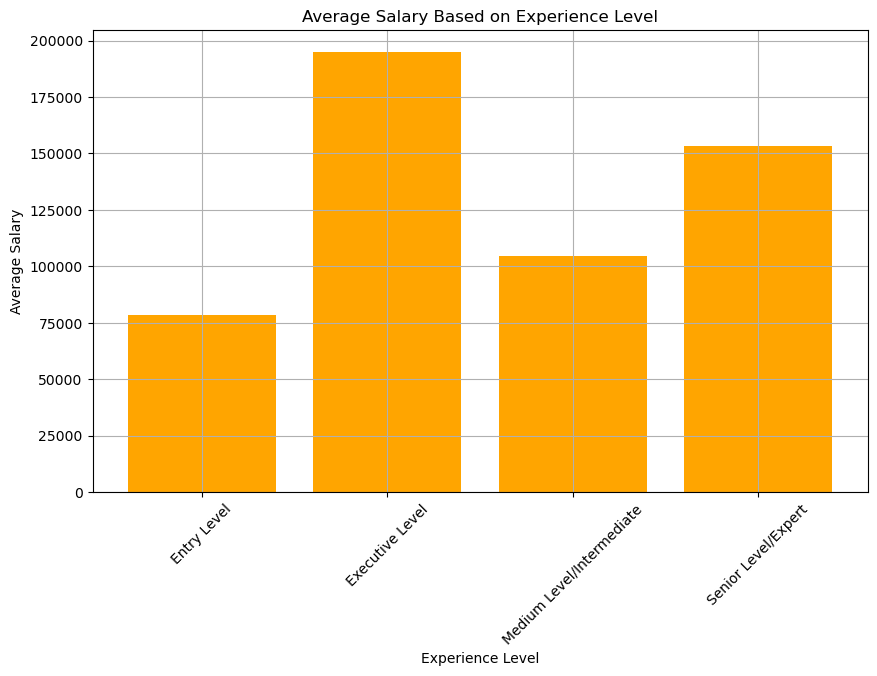

In [41]:
plt.figure(figsize=(10, 6)) # figure size
plt.bar(salaryAvg.index, salaryAvg.values, color='orange') # Bar plot with average salary data
plt.xlabel('Experience Level') # label for the x-axis
plt.ylabel('Average Salary') # label for the y-axis
plt.title('Average Salary Based on Experience Level') # Title
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.grid(True)  
plt.show()

<h1> Program to show histogram and box plot of any chosen different variables. Use proper labels in the graph. </h1>

<h1> Histogram for Salary. </h1>

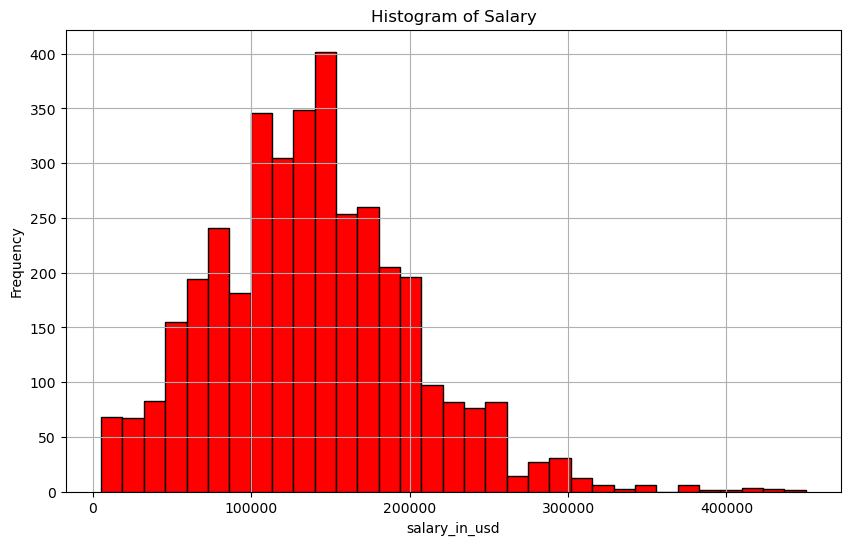

In [44]:
plt.figure(figsize=(10, 6)) # figure size
# Histogram for work_year
plt.hist(revised_data['salary_in_usd'],bins=33, color='red', edgecolor='black') # Histogram of work_year data
plt.grid(True) # displays grids
plt.title('Histogram of Salary') # Title
plt.xlabel('salary_in_usd') # x-axis Label
plt.ylabel('Frequency') # y-axis Label
# Show the plot
plt.show()

<h1> Box Plot for Work Year </h1>

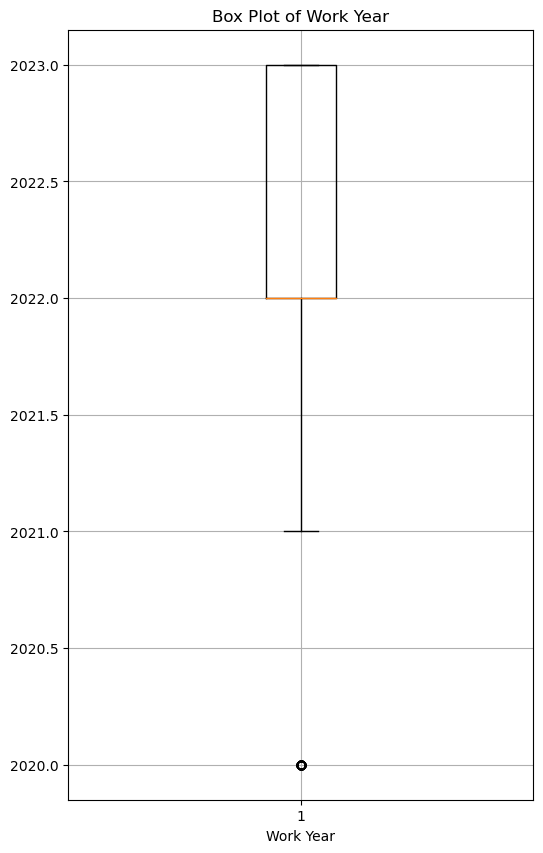

In [46]:
plt.figure(figsize=(6, 10))  # figure size
plt.boxplot(revised_data['work_year']) # Boxplot of salary in usd data
plt.title('Box Plot of Work Year') # title
plt.xlabel('Work Year') # x-label
# Show the box plot
plt.grid(True)
plt.show()

<h1> End </h1>